In [1]:


#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import io
import requests

from timeit import default_timer as timer
from sklearn.manifold import TSNE

import altair as alt
# for the notebook only (not for JupyterLab) run this command once per session
#alt.renderers.enable('notebook')
alt.data_transformers.disable_max_rows()

from umap import UMAP



# Cohorts

In [2]:
n = 12334
all = [1] * 12334
known_mutation_state = [1] * 6795 + [0] * 5539
mutated = [1] * 473 + [0] * (n - 473)
non_mutated = [0] * 473 + [1] * 6322 + [0] * (n-473-6322)

mutated_colon = [1] * 57 + [0] * (n-57)
mutated_lung = [0] * 57 + [1] * 75 + [0] * (n-57-75)
mutated_pancreas = [0] * (57+75) + [1] * 136 + [0] * (n-57-75-136)

In [3]:
len(mutated_pancreas)

12334

In [4]:
items_in_cohorts = [all, non_mutated, mutated, mutated_colon, mutated_lung, mutated_pancreas]

# UMAP

In [59]:
scores_umap = UMAP(n_components=2, n_neighbors=4).fit_transform(items_in_cohorts)

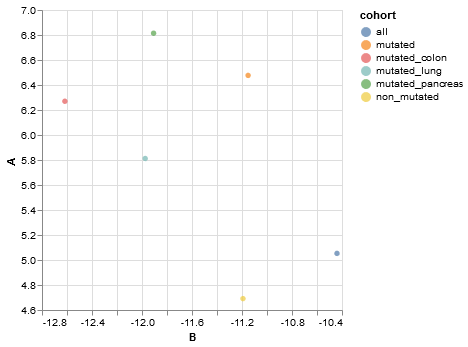

In [93]:
scores_umap = UMAP(n_components=2, n_neighbors=4).fit_transform(items_in_cohorts)
df_umap_scores = pd.DataFrame(scores_umap, columns=['A','B'])
df_umap_scores = pd.concat([df_umap_scores, pd.DataFrame(['all', 'non_mutated', 'mutated', 'mutated_colon', 'mutated_lung', 'mutated_pancreas'], columns=['cohort'])], axis='columns')

alt.Chart(df_umap_scores).mark_circle(
#    opacity=0.6,
#    tooltip=alt.TooltipContent('encoding')
).encode(
    alt.Y('A:Q', scale=alt.Scale(zero=False)),
    alt.X('B:Q', scale=alt.Scale(zero=False)),
    color='cohort:N',
    tooltip='cohort:N'
).properties(
    width=300, # per plot; see https://altair-viz.github.io/user_guide/configuration.html#view-configuration
    height=300
).interactive()